In [1]:
#Vehicle fuel Economy Analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
fuel = pd.read_csv('database.csv', header=0, low_memory=False)

In [4]:
# Have a quick look at all the columns and understant what type of data exist
fuel.columns

Index(['Vehicle ID', 'Year', 'Make', 'Model', 'Class', 'Drive', 'Transmission',
       'Transmission Descriptor', 'Engine Index', 'Engine Descriptor',
       'Engine Cylinders', 'Engine Displacement', 'Turbocharger',
       'Supercharger', 'Fuel Type', 'Fuel Type 1', 'Fuel Type 2',
       'City MPG (FT1)', 'Unrounded City MPG (FT1)', 'City MPG (FT2)',
       'Unrounded City MPG (FT2)', 'City Gasoline Consumption (CD)',
       'City Electricity Consumption', 'City Utility Factor',
       'Highway MPG (FT1)', 'Unrounded Highway MPG (FT1)', 'Highway MPG (FT2)',
       'Unrounded Highway MPG (FT2)', 'Highway Gasoline Consumption (CD)',
       'Highway Electricity Consumption', 'Highway Utility Factor',
       'Unadjusted City MPG (FT1)', 'Unadjusted Highway MPG (FT1)',
       'Unadjusted City MPG (FT2)', 'Unadjusted Highway MPG (FT2)',
       'Combined MPG (FT1)', 'Unrounded Combined MPG (FT1)',
       'Combined MPG (FT2)', 'Unrounded Combined MPG (FT2)',
       'Combined Electricity Consu

In [5]:
fuel.shape

(38113, 81)

In [6]:
fuel.isnull().sum()

Vehicle ID                               0
Year                                     0
Make                                     0
Model                                    0
Class                                    0
Drive                                 1189
Transmission                            11
Transmission Descriptor              23068
Engine Index                             0
Engine Descriptor                    15420
Engine Cylinders                       136
Engine Displacement                    134
Turbocharger                         32874
Supercharger                         37420
Fuel Type                                0
Fuel Type 1                              0
Fuel Type 2                          36675
City MPG (FT1)                           0
Unrounded City MPG (FT1)                 0
City MPG (FT2)                           0
Unrounded City MPG (FT2)                 0
City Gasoline Consumption (CD)           0
City Electricity Consumption             0
City Utilit

In [7]:
# Create a column to identify whether the car is a electric car
fuel['electric'] = fuel['Electric Motor']
fuel.loc[fuel['electric'].notnull(), 'electric'] = 1
fuel.electric.fillna(value=0, inplace=True)

In [8]:
# Create a new dataframe and pick the columns that I think are relevant to predicting mpg and fuel consumption
fueleff = fuel[['Year', 'Make', 'Drive', 'Transmission', 'Engine Cylinders','City MPG (FT1)', 'Highway MPG (FT1)', 'Combined MPG (FT1)', 'Annual Fuel Cost (FT1)','Tailpipe CO2 in Grams/Mile (FT1)', 'electric']]

In [9]:
# Create simplified column for easier coding
names = ['yr', 'make', 'drive', 'tran', 'cyc', 'cmpg1','hmpg1', 'compg1', 'ft1','co2', 'ecar']
fueleff.columns = names

In [10]:
fueleff.head()

,yr,make,drive,tran,cyc,cmpg1,hmpg1,compg1,ft1,co2,ecar
0,1984,Alfa Romeo,NaN,Manual 5-Speed,6.0,17,24,20,1750,444.350000,0
1,1984,Alfa Romeo,NaN,Manual 5-Speed,6.0,17,24,20,1750,444.350000,0
2,1984,Alfa Romeo,NaN,Manual 5-Speed,4.0,18,25,21,1650,423.190476,0
3,1984,Alfa Romeo,NaN,Manual 5-Speed,4.0,18,25,21,1650,423.190476,0
4,1984,AM General,2-Wheel Drive,Automatic 3-Speed,4.0,18,17,17,2050,522.764706,0


In [11]:
# Check missing values for compg1, none exist
fueleff['compg1'].unique()

array([ 20,  21,  17,  13,  18,   9,   8,  24,  19,  16,  22,  14,  23,
        25,  15,  26,  27,  30,  36,  11,  12,  28,  29,  10,  34,  33,
        31,  32,  39,  35,  41,  40,  37,  38,  42,  43,  48,  46,   7,
        47,  44,  55,  58,  85,  56,  53,  72,  65,  75,  78,  52,  98,
        50, 102,  99,  87,  62,  73, 105, 112,  89,  76,  63, 116, 118,
       115, 121, 107,  94,  95, 124, 119,  84, 114, 101, 100,  93, 104,
       103,  92,  86, 136,  49,  54], dtype=int64)

In [12]:
# Understanding the categories within drive
fueleff['drive'].unique()

array([nan, '2-Wheel Drive', '4-Wheel or All-Wheel Drive',
       'Rear-Wheel Drive', 'Front-Wheel Drive', '4-Wheel Drive',
       'All-Wheel Drive', 'Part-time 4-Wheel Drive'], dtype=object)

In [13]:
# Simplified category for all wheel or rear wheel drive
fueleff['drive'].replace(to_replace=['2-Wheel Drive','Front-Wheel Drive'], value='Rear-Wheel Drive', inplace=True)
fueleff['drive'].replace(to_replace=['4-Wheel or All-Wheel Drive', '4-Wheel Drive','Part-time 4-Wheel Drive'], value='All-Wheel Drive', inplace=True)

C:\Users\SIT\Anaconda3\lib\site-packages\pandas\core\generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [14]:
# Simplified category for transmission type
fueleff['trancat'] = fueleff['tran'].str[0:4]
# Map the type to numeric value for model fitting purposes
fueleff['tran_num'] = fueleff.trancat.map({'Manu': 0, 'Auto': 1})

C:\Users\SIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\SIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


<Figure size 432x1152 with 0 Axes>

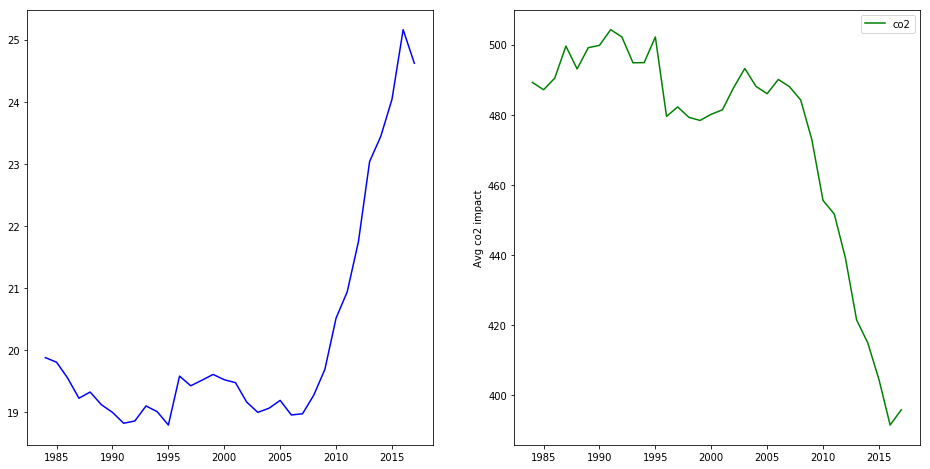

In [15]:
# graph go obtain an overwheel of mpg improvement over the course of the year as well as decrease in fuel consumption
plt.figure(figsize=(6,16));
fig, (ax1, ax3) = plt.subplots(nrows=1, ncols=2, figsize=[16,8])
ax1.plot(fueleff.groupby(['yr'])[['compg1']].mean(), color='b')
plt.ylabel('Avg mpg')
# ax2.plot(fueleff.groupby(['yr'])[['ft1']].mean(), color='r', label='fuel')
# plt.legend(loc='lower left')
# ax3 = ax2.twinx()
ax3.plot(fueleff.groupby(['yr'])[['co2']].mean(), color='g', label='co2')
plt.ylabel('Avg co2 impact')
plt.legend(loc='best')
plt.show();

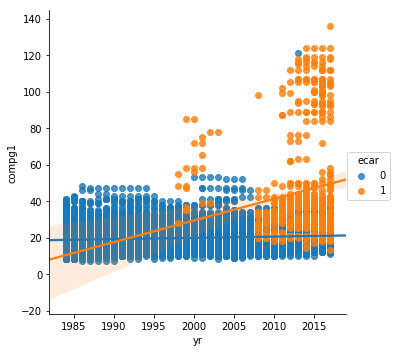

In [16]:
# showing that it was mainly electric car that increase the average as non-electric car average actually didn't improve by much
sns.lmplot(x='yr', y='compg1', data=fueleff, hue='ecar');

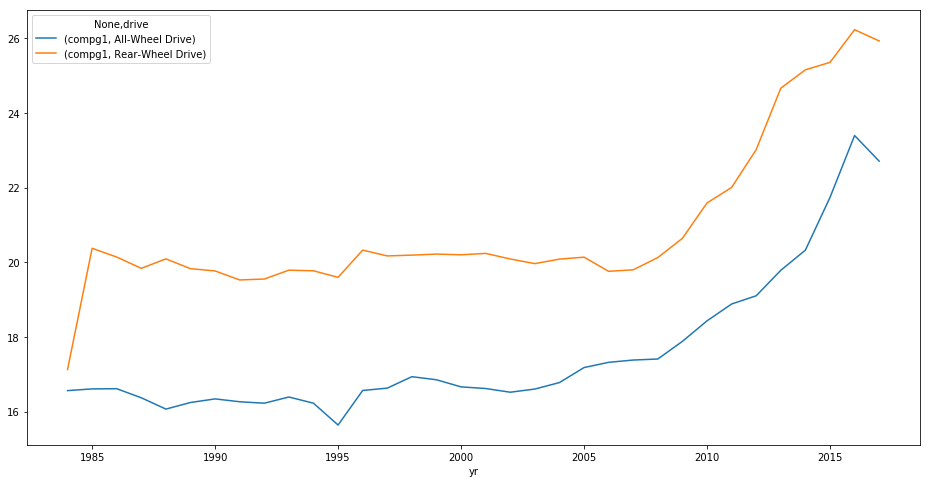

In [17]:
# See if it there is huge difference between all wheel drive and rear wheel drive
graphdata1 = fueleff.groupby(['yr','drive'])[['compg1']].mean()

graphdata1.unstack().plot(figsize=[16,8], kind='line');

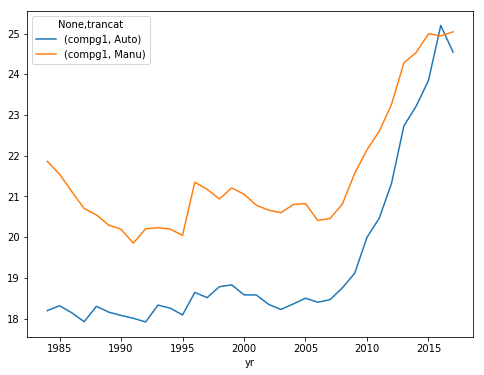

In [18]:
# See if transmission type matters. Surprise to see that automatic car is now in par with manual transmission cars
graphdata2 = fueleff.groupby(['yr','trancat'])[['compg1']].mean()

graphdata2.unstack().plot(figsize=[8,6], kind='line');

In [19]:
fueleff.isnull().sum()

yr             0
make           0
drive       1189
tran          11
cyc          136
cmpg1          0
hmpg1          0
compg1         0
ft1            0
co2            0
ecar           0
trancat       11
tran_num      11
dtype: int64

In [20]:
# There are only 1,200 records out of 38,000 row, okay to drop. If drive isn't an important metric, would drop that featurs in order to keep that 1,200 records
fueleff.dropna(inplace=True)

C:\Users\SIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


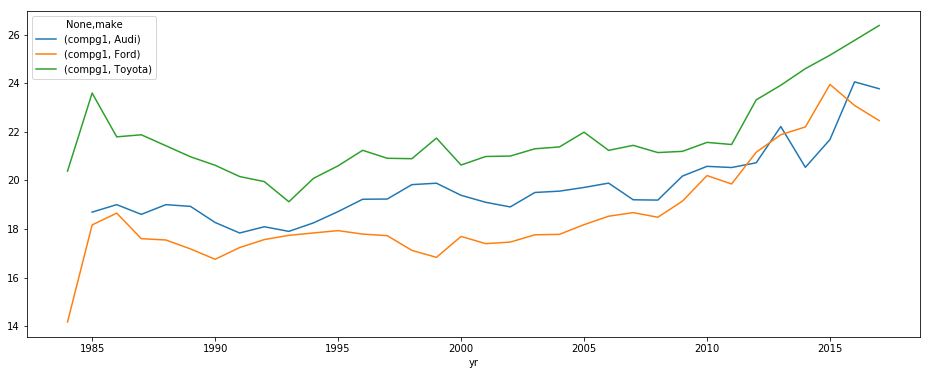

In [21]:
# A quick peak on mpg for major brands. One Japanese, one American, one European
graph = fueleff[fueleff.make.isin(['Ford', 'Toyota', 'Audi'])]
graphdata3 = graph.groupby(['yr','make'])[['compg1']].mean()

graphdata3.unstack().plot(figsize=[16,6], kind='line');

In [22]:
fueleff.describe()

,yr,cyc,cmpg1,hmpg1,compg1,ft1,co2,ecar,tran_num
count,36794.000000,36794.000000,36794.000000,36794.000000,36794.000000,36794.000000,36794.000000,36794.000000,36794.000000
mean,2000.672066,5.761265,17.644018,23.796815,19.902294,1983.126325,475.580844,0.012828,0.675790
std,10.203345,1.754222,4.764544,5.787124,5.076540,528.534991,119.124057,0.112534,0.468085
min,1984.000000,2.000000,6.000000,9.000000,7.000000,600.000000,29.000000,0.000000,0.000000
25%,1991.000000,4.000000,15.000000,20.000000,16.000000,1600.000000,397.000000,0.000000,0.000000
50%,2001.000000,6.000000,17.000000,24.000000,19.000000,1950.000000,467.736842,0.000000,1.000000
75%,2010.000000,6.000000,20.000000,27.000000,22.000000,2350.000000,555.437500,0.000000,1.000000
max,2017.000000,16.000000,58.000000,61.000000,58.000000,6050.000000,1269.571429,1.000000,1.000000


C:\Users\SIT\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


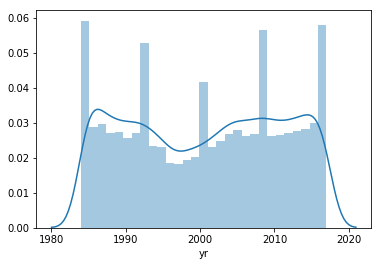

In [24]:
# Distribution of data across years, data tend to skew toward older years
sns.distplot(fueleff['yr']);

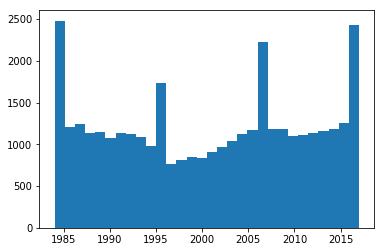

In [25]:
plt.hist(fueleff['yr'], bins=30);